In [13]:
# import required modules
import osmnx
import networkx as nx

In [22]:
# a location as a center of the generated graph
src = "Ho Chi Minh City University of Technology District 10"
dest = osmnx.geocoder.geocode("Chợ bến thành")

In [24]:
dest

(10.7725301, 106.69803652841517)

In [30]:
# read the graph from OpenStreetMap and convert it to Networkx data
osmG = osmnx.graph_from_point( dest, dist=1000, dist_type='bbox', network_type='drive', simplify=True, retain_all=False, truncate_by_edge=False, clean_periphery=None, custom_filter=None )
#G = nx.Graph( osmG.to_undirected() )
G = nx.Graph( osmG )

/Users/thuannt.se/miniconda3/envs/ox/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/thuannt.se/miniconda3/envs/ox/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/thuannt.se/miniconda3/envs/ox/lib/python3.11/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


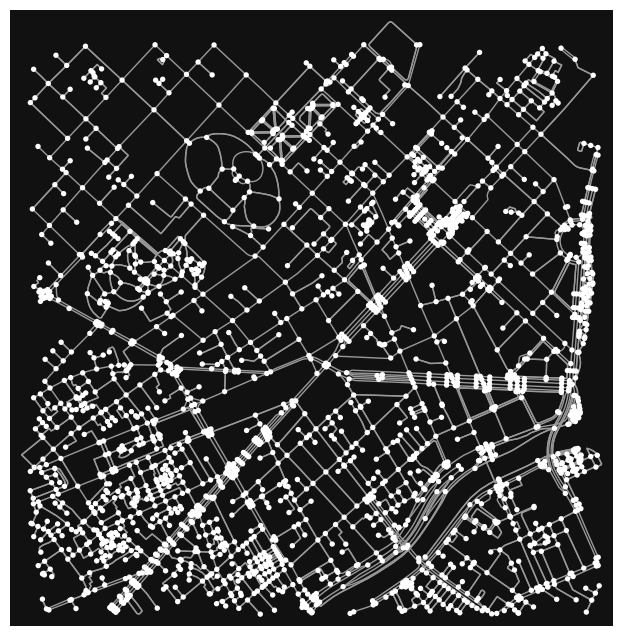

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [31]:
# plot the OpenStreetMap graph
osmnx.plot_graph( osmG )

In [32]:
# plot the graph on map
osmnx.folium.plot_graph_folium( osmG )

/var/folders/73/f6bjb2fs44n3qjx3xfv_d7ph0000gn/T/ipykernel_38781/1458011984.py:2: UserWarning: The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  osmnx.folium.plot_graph_folium( osmG )
/Users/thuannt.se/miniconda3/envs/ox/lib/python3.11/site-packages/shapely/set_operations.py:426: RuntimeWarning: invalid value encountered in unary_union
  return lib.unary_union(collections, **kwargs)


In [33]:
# Retrieve nodes and edges in GeoPandas
nodes, edges = osmnx.graph_to_gdfs( osmG )

In [ ]:
# generate a forward map and reverse map between osmid to ids ranged from 0->#nodes
i = 0
idmap = dict()
idrmap = dict()
for n in G.nodes(data=False):
    idmap[n] = i
    idrmap[i] = n
    i = i+1

In [ ]:
# create a graph compatible to naive_dijkstra's algorithm
graph = dict()
for n in range( G.number_of_nodes() ):
    graph[n] = []
for line in nx.generate_adjlist(G):
    nodes = line.split(" ")
    for a in range(1,len(nodes)):
        graph[idmap[int(nodes[0])]] += [( idmap[int(nodes[a])], 
                                         G.edges[int(nodes[0]),int(nodes[a])]['length'] )]
        graph[idmap[int(nodes[a])]] += [( idmap[int(nodes[0])], 
                                         G.edges[int(nodes[0]),int(nodes[a])]['length'] )]

In [ ]:
graph